<a href="https://colab.research.google.com/github/PabloBrianese/introduction-to-deep-learning/blob/main/chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

data_path = 'kc_house_data.csv'

housing = pd.read_csv(data_path)

housing.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [9]:
import numpy as np
import tensorflow as tf

# Use a numpy array to define price as a 32-bit float
price = np.array(housing.price, np.float32)

# Define waterfront as a Boolean using cast
waterfront = tf.cast(housing.waterfront, tf.bool)

print(price); print(waterfront)

[221900. 538000. 180000. ... 402101. 400000. 325000.]
tf.Tensor([False False False ... False False False], shape=(21613,), dtype=bool)


In [ ]:
# Compute the MSE loss
targets = [1, 2]
predictions = [1.1, 2.1]
loss = tf.keras .losses.mse(targets, predictions)
loss

<tf.Tensor: shape=(), dtype=float32, numpy=0.009999992>

In [ ]:
# Define a a linear regression model
def linear_regression(intercept, slope, features):
  return intercept + features * slope


# Define a loss function to compute the MSE
def loss_function(intercept, slope, targets, features):
  # Compute the predictions for a linear model
  predictions = linear_regression(intercept, slope, features)

  # Compute the MSE loss
  loss = tf.keras.losses.mse(targets, predictions)
  
  return loss


intercept = 0
slope = 1
targets = np.ones([5])
features = np.zeros([5])

loss_function(intercept, slope, targets, features)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [ ]:
# Tensor of house prices
price = np.array([ 221900.,  538000.,  180000.,  604000.,  510000., 1225000.,
        257500.,  291850.,  229500.,  323000.], dtype=np.float32)

# Tensor of predicted house prices
predictions = np.array([154546.51228417, 153942.9622033 ,  40833.26164156, 332994.12052607,
       366929.17459064, 518305.41365246, 252546.78108404, 199867.55920599,
       110373.87139066, 126653.95837671])

# Import the keras module from tensorflow
from tensorflow import keras

# Compute the mean squared error (mse)
mse = keras.losses.mse(price, predictions)

print(mse.numpy())

# Compute the mean absolute error (mae)
mae = keras.losses.mae(price, predictions)

print(mae.numpy())

82596247419.03
212375.63850444002


In [ ]:
features = tf.constant([1., 2., 3., 4., 5.], dtype=tf.float32)
targets = tf.constant([ 2.,  4.,  6.,  8., 10.], dtype=tf.float32)

# Initialize a variable named scalar
scalar = tf.Variable(1.0, dtype=tf.float32)


# Define the model
def model(scalar, features=features):
  return scalar * features


# Define a loss function
def loss_function(scalar, features=features, targets=targets):
  # Compute the predicted values
  predictions = model(scalar, features)

  # Return the mean absolute error loss
  return keras.losses.mae(targets, predictions)


# Evaluate the loss function and print the loss
loss_function(scalar).numpy()

3.0

In [ ]:
# Define the targets and features
price = np.array(housing.price, np.float32)
size = np.array(housing.sqft_living, np.float32)

# Define the intercept and slope, as trainable Variables
intercept = tf.Variable(0.1, np.float32)
slope = tf.Variable(0.1, np.float32)
var_list = [intercept, slope]


# Define a linear regression model
def linear_regression(intercept, slope, features=size):
  return intercept + features * slope


# Compute the predicted values and loss
def loss_function(intercept, slope, targets=price, features=size):
  predictions = linear_regression(intercept, slope)
  return tf.keras.losses.mse(targets, predictions)


# Define an optimization operation
opt = tf.keras.optimizers.Adam()

# Minimize the loss function and print the loss
for j in range(10000):
  opt.minimize(lambda: loss_function(*var_list), var_list=var_list)
  if not j % 1000: print(loss_function(*var_list))


print(intercept.numpy(), slope.numpy())

tf.Tensor(426196570000.0, shape=(), dtype=float32)
tf.Tensor(423483800000.0, shape=(), dtype=float32)
tf.Tensor(420784930000.0, shape=(), dtype=float32)
tf.Tensor(418098580000.0, shape=(), dtype=float32)
tf.Tensor(415423560000.0, shape=(), dtype=float32)
tf.Tensor(412759430000.0, shape=(), dtype=float32)
tf.Tensor(410106400000.0, shape=(), dtype=float32)
tf.Tensor(407463700000.0, shape=(), dtype=float32)
tf.Tensor(404831100000.0, shape=(), dtype=float32)
tf.Tensor(402207700000.0, shape=(), dtype=float32)
10.066566 10.068806


In [14]:
np.log(housing.price)

0        12.309982
1        13.195614
2        12.100712
3        13.311329
4        13.142166
           ...    
21608    12.793859
21609    12.899220
21610    12.904459
21611    12.899220
21612    12.691580
Name: price, Length: 21613, dtype: float64

In [16]:
size_log = np.array([ 8.639411 ,  8.887652 ,  9.2103405,  8.517193 ,  8.997148 ,
       11.532042 ,  8.827468 ,  9.181015 ,  8.918651 ,  8.788746 ],
      dtype=np.float32)
price_log = np.array([12.309982, 13.195614, 12.100712, 13.31133 , 13.142166, 14.018452,
       12.458775, 12.583995, 12.343658, 12.685408], dtype=np.float32)


# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
  return intercept + features * slope


# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features=size_log, targets=price_log):
  # Set the predicted values
  predictions = linear_regression(intercept, slope, features)

  # Compute the mean squared error loss
  mse = tf.keras.losses.mse(targets, predictions)

  return mse


# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

139.50249
66.45302


In [18]:
# Initialize intercept and slope as variables
intercept = tf.Variable(5.0, tf.float32)
slope = tf.Variable(0.001, tf.float32)
var_list = [intercept, slope]

# Initialize an Adam optimizer
opt = tf.keras.optimizers.Adam(0.5)

for j in range(100):
  # Apply minimize, pass the loss function, and supply the variables
  opt.minimize(lambda: loss_function(*var_list), var_list=var_list)

  # Print every 10th value of the loss
  if j % 10 == 0:
    print(loss_function(*var_list).numpy())

7.650777
10.579771
0.32019067
1.5415816
0.27557558
0.4387912
0.29008627
0.25297967
0.25202858
0.24904196


Text(0, 0.5, 'log(price)')

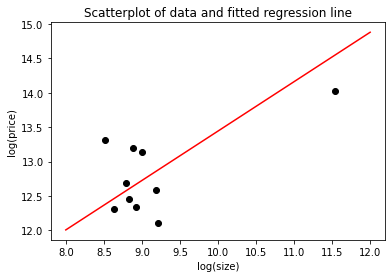

In [28]:
from matplotlib import pyplot as plt

# Plot data
plt.scatter(size_log, price_log, c='black')

# Plot model predictions
x = np.linspace(8, 12)
plt.plot(x, intercept + slope * x, c='red')

# Annotations
plt.title('Scatterplot of data and fitted regression line')
plt.xlabel('log(size)')

plt.ylabel('log(price)')

In [44]:
# We will add another feature to the model
bedrooms = np.array([3., 3., 2., 4., 3., 4., 3., 3., 3., 3.], dtype=np.float32)

# Define parameters as a variable tensor
params = tf.Variable([0.1, 0.05, 0.02], tf.float32)


# Define the linear regression model
def linear_regression(params, feature1=size_log, feature2=bedrooms):
  return params[0] + feature1 * params[1] + feature2 * params[2]


# Define the loss function
def loss_function(params, targets=price_log, feature1=size_log, feature2=bedrooms):
  # Set the predicted values
  predictions = linear_regression(params, feature1, feature2)

  # Use the mean absolute error loss
  return tf.keras.losses.mae(targets, predictions)


# Define the optimize operation
opt = tf.keras.optimizers.Adam()

# Perform minimization and print trainable variables
for j in range(12 * 100):
  opt.minimize(lambda: loss_function(params), var_list=[params])
  if j % 100 == 0:
    print(params.numpy(), loss_function(params).numpy())


[0.101 0.051 0.021] 12.1822605
[0.20100015 0.15100016 0.12100006] 10.857264
[0.30099958 0.25100034 0.22100025] 9.532264
[0.4009983  0.35099906 0.32099938] 8.207283
[0.500997   0.45099777 0.4209981 ] 6.8823037
[0.6009957 0.5509965 0.5209968] 5.5573244
[0.70099443 0.6509952  0.6209955 ] 4.232344
[0.80099314 0.7509939  0.72099423] 2.907365
[0.90099186 0.8509926  0.82099295] 1.5823852
[0.9843985  0.9299507  0.89943576] 0.7909258
[1.0373633  0.9784519  0.94775754] 0.43075055
[1.0387346  0.97638947 0.9454059 ] 0.429959
[1.0422698  0.97612876 0.9448865 ] 0.42983675


In [46]:
import pandas as pd
import numpy as np

# Load data in batches
for batch in pd.read_csv('kc_house_data.csv', chunksize=100):
  # Extract price column
  price = np.array(batch.price, np.float32)

  # Extract size column
  size = np.array(batch.size, np.float32)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

# Define trainable variables
intercept = td.Variable(0.1, tf.float32)
slope = tf.Variable(0.1, tf.float32)


# Define the model
def linear_regression(intercept, slope, features):
  return intercept + features * slope
